In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from kan import KAN

# Pendulum equation inference
This is a toy example of symbolic regression in KAN.
Using the mobile app [phyphox](https://phyphox.org/), I recorded my smartphone's gyroscope and accelerometer sensors while it was swaying with a 50cm twine.
The latter is notably less accurate than the former.

The symbolic regression gives an angular velocity of about 4 rad/s which indicates that a complete swing is made in about 0.785 s.

# Datasets plotting

C:\Users\MrPio\AppData\Local\Temp\ipykernel_19428\3541933491.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_g = df_g[df_g['Time (s)'] < 175][df_g['Time (s)'] > 170]


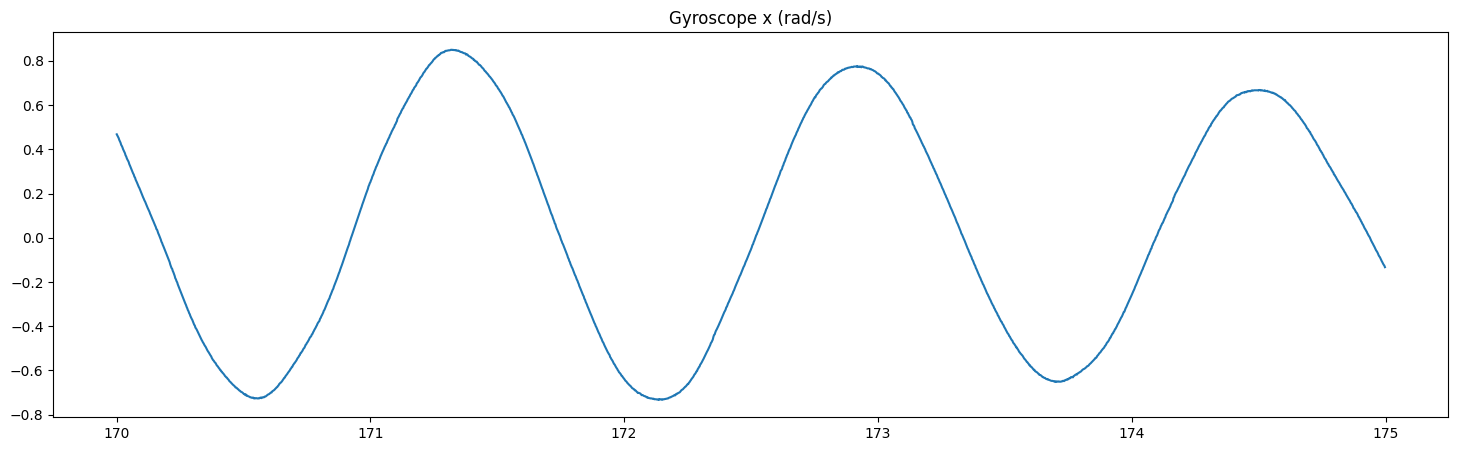

In [64]:
df_g = pd.read_csv('raw/Gyroscope.csv')
df_g = df_g[df_g['Time (s)'] < 175][df_g['Time (s)'] > 170]

fig, ax = plt.subplots()
ax.plot(df_g['Time (s)'], df_g['Gyroscope x (rad/s)'])
fig.set_size_inches(18, 5)
plt.title('Gyroscope x (rad/s)')
plt.show()

C:\Users\MrPio\AppData\Local\Temp\ipykernel_19428\1178030548.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_a = df_a[df_a['Time (s)'] < 175][df_a['Time (s)'] > 170]


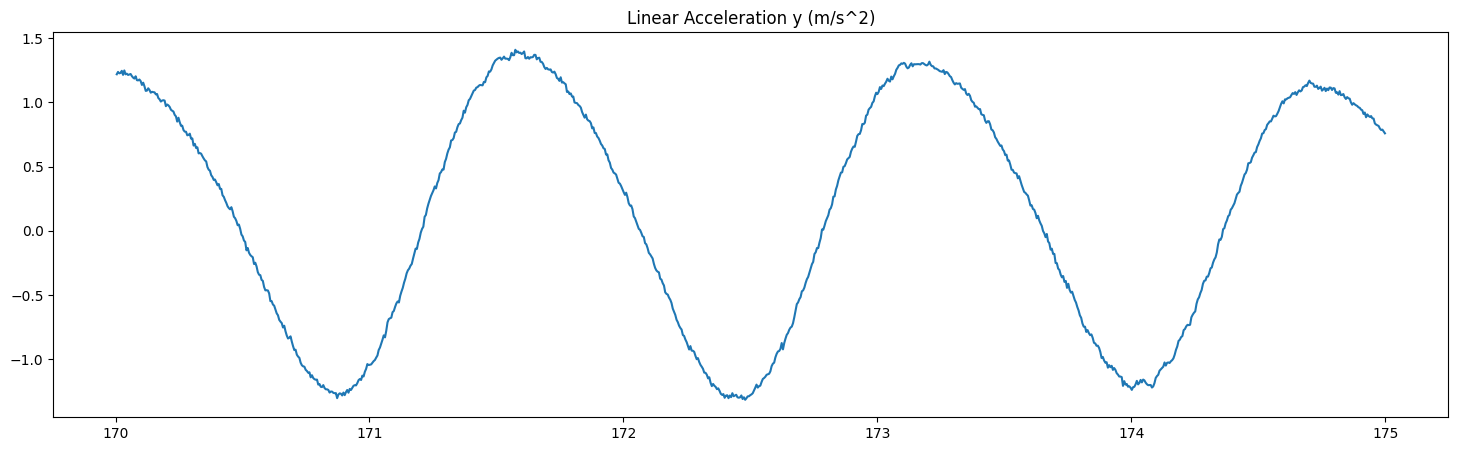

In [65]:
df_a = pd.read_csv('raw/Linear Acceleration.csv')
df_a = df_a[df_a['Time (s)'] < 175][df_a['Time (s)'] > 170]

fig, ax = plt.subplots()
ax.plot(df_a['Time (s)'], df_a['Linear Acceleration y (m/s^2)'])
fig.set_size_inches(18, 5)
plt.title('Linear Acceleration y (m/s^2)')
plt.show()

# Acceleration Symbolic Regression with KAN

In [157]:
model = KAN(width=[1, 1], grid=40, k=3, seed=0)
train_set = df_a.sample(frac=0.7, random_state=99)
test_set = df_a.drop(train_set.index)
dataset = {'train_input': torch.tensor(train_set['Time (s)'].values).view(-1, 1),
           'train_label': torch.tensor(train_set['Linear Acceleration y (m/s^2)'].values).view(-1, 1),
           'test_input': torch.tensor(test_set['Time (s)'].values).view(-1, 1),
           'test_label': torch.tensor(test_set['Linear Acceleration y (m/s^2)'].values).view(-1, 1)}

train loss: 1.69e-02 | test loss: 1.75e-02 | reg: 1.55e-02 : 100%|██| 40/40 [00:05<00:00,  7.56it/s]


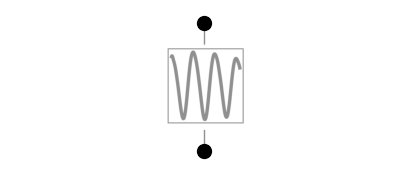

In [158]:
model.train(dataset, opt="LBFGS", steps=40, lamb=0.1, lamb_entropy=1., lamb_l1=0.1)
model(dataset['train_input'])
model.plot()

In [159]:
model.suggest_symbolic(0,0,0)

function , r2
sin , 0.9842185010535989
cosh , 0.04174916894041148
exp , 0.04166372377011156
tan , 0.03757230809703045
gaussian , 0.01919588054048524


('sin',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9842185010535989)

skipping (0,0,0) since already symbolic


1.24*sin(4.0*t - 6.39) + 0.09

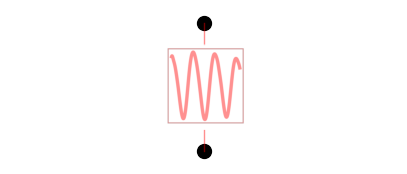

In [163]:
model.auto_symbolic()
model.plot()
formula, variables = model.symbolic_formula(var=['t'])
formula[0]

# Angular Velocity Symbolic Regression with KAN

In [165]:
model2 = KAN(width=[1, 1], grid=40, k=3, seed=0)
train_set = df_g.sample(frac=0.7, random_state=99)
test_set = df_g.drop(train_set.index)
dataset = {'train_input': torch.tensor(train_set['Time (s)'].values).view(-1, 1),
           'train_label': torch.tensor(train_set['Gyroscope x (rad/s)'].values).view(-1, 1),
           'test_input': torch.tensor(test_set['Time (s)'].values).view(-1, 1),
           'test_label': torch.tensor(test_set['Gyroscope x (rad/s)'].values).view(-1, 1)}

train loss: 4.24e-03 | test loss: 3.62e-03 | reg: 8.82e-03 : 100%|██| 40/40 [00:06<00:00,  5.82it/s]


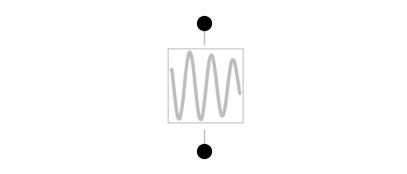

In [166]:
model2.train(dataset, opt="LBFGS", steps=40, lamb=0.1, lamb_entropy=1., lamb_l1=0.1)
model2(dataset['train_input'])
model2.plot()

In [167]:
model2.suggest_symbolic(0,0,0)

function , r2
sin , 0.993195026925326
tan , 0.038472598262838935
exp , 0.03691712356642687
cosh , 0.03691712356642686
arcsin , 0.03292426331853793


('sin',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.993195026925326)

skipping (0,0,0) since already symbolic


0.04 - 0.73*sin(3.96*t + 4.11)

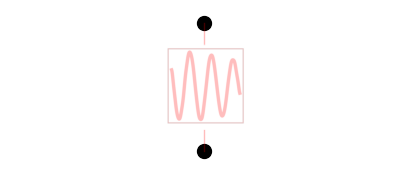

In [169]:
model2.auto_symbolic()
model2.plot()
formula, variables = model2.symbolic_formula(var=['t'])
formula[0]